### Enter Aircraft Code

In [1]:
aircraft_code = "N607UP"

In [28]:
from bs4 import BeautifulSoup
import requests
from selenium import webdriver

HEADERS = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36 Edg/111.0.1661.62'
    }
# html_text = requests.get("https://flightaware.com/resources/registration/" + aircraft_code, headers=HEADERS).text
dr = webdriver.Edge()
dr.get("https://flightaware.com/resources/registration/" + aircraft_code)


In [29]:
# soup = BeautifulSoup(html_text, 'lxml')
soup = BeautifulSoup(dr.page_source,"lxml")
soup.text

"\n\n\n\n\n\nN607UP (2017 BOEING 747-8F owned by C C & E I LLC) Aircraft Registration - FlightAware\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nProducts\n\n\n\n\n\n\nData Products\n\n\n\n\n\nAeroAPI\nFlight data API with on-demand flight status and flight tracking data.\n\n\n\n\n\n\n\nFlightAware Firehose\nStreaming flight data feed for enterprise integrations with real-time, historical and predictive flight data.\n\n\n\n\n\n\n\nFlightAware Foresight\nPredictive technology to strengthen customer trust in your operations\n\n\n\n\n\n\n\nRapid Reports\nQuickly purchase historical reports delivered via email.\n\n\n\n\n\n\n\nCustom Reports\nConsultative detailed and customized flight tracking data reports.\n\n\n\n\n\n\n\nIntegrated Mapping Solutions\nIncorporate FlightAware maps in your web and mobile applications\n\n\n\n \n\nApplications\n\n\n\n\n\nFlightAware Aviator\nThe

In [30]:
info = soup.find('div', class_="pageContainer")
f = info.findAll('div', class_='row attribute-row')

In [31]:
def remove_delimiters(word):
    h = []
    for i in word:
        if i != '\n' and i != '\t':
            h.append(i)
    return "".join(h)

In [32]:
d = {}
for flight_number_info in f:
    d[flight_number_info.find('div', class_='medium-1 columns title-text').text] = remove_delimiters(flight_number_info.find('div', class_='medium-3 columns').text.replace('\n', ' '))

d

{'Summary': '2017 BOEING 747-8F Fixed wing multi engine (8 seats / 4 engines)',
 'Owner': 'C C & E I LLC LOUISVILLE , KY, US ',
 'Airworthiness Class': 'Standard/Transport',
 'Serial Number': '64265',
 'Engine': 'GE GENX-2B67/P (Turbo-fan)Thrust: 67400lbs',
 'Weight': 'Over 20,000lbs',
 'Speed': 'Not defined',
 'Mode S Code': '051761420 / A7E310',
 'Status': 'Assigned',
 'Certificate Issue Date': '2017-10-19',
 'Airworthiness Date': '2017-10-15',
 'Last Action Date': '2020-06-01',
 'Expiration': '2023-10-31',
 'Registry Source': 'FAA'}

### Further Information

In [38]:
ac2 = aircraft_code.upper()
# req = requests.get("https://www.flightera.net/en/planes/"+ac2, headers=HEADERS)
# html_text = req.content
dr.get("https://www.flightera.net/en/planes/"+ac2)
soup2 = BeautifulSoup(dr.page_source,"lxml")

In [41]:
# if req.status_code < 300:
# soup2 = BeautifulSoup(html_text, 'lxml')
info2 = soup2.find('div', class_='py-10 max-w-5xl mx-auto')
f = info2.find('div', class_='max-w-7xl mx-auto px-4 sm:px-6 lg:px-8')
g = f.find('h1',class_='text-xl font-bold leading-tight text-gray-900 dark:text-white').text

print('Aircraft - ' + remove_delimiters(g))
# else:
#     print("Not Available")

Aircraft - N607UP: United Parcel Service (UPS) Boeing B747-800


In [71]:
import pandas as pd
# if req.status_code < 300:
tables = pd.read_html(dr.page_source)
df0 = tables[0]
df0.rename(columns={0:"", 1:"Information"}, inplace=True)
display(df0)
# else:
#     print("Not Available")

,DATE,FLIGHT NUMBER,FROM,TO,DEPARTED,ARRIVED,Unnamed: 6
0,11. Jan Landed,5X2998,Louisville 15min late Louisville (SDF / KSDF)...,Anchorage 17min early Anchorage (ANC / PANC) ...,17:09 15min late,19:26 17min early,NaN
1,11. Jan Landed,5X2751,Dallas 10min late Dallas (DFW / KDFW) 08:29 CST,Louisville 16min early Louisville (SDF / KSDF...,08:39 10min late,11:00 16min early,NaN
2,11. Jan Landed,5X752,Louisville 32min late Louisville (SDF / KSDF)...,Dallas 18min late Dallas (DFW / KDFW) 04:39 CST,04:09 32min late,04:57 18min late,NaN
3,10. Jan Landed,5X63,Anchorage 20min late Anchorage (ANC / PANC) ...,Louisville 13min late Louisville (SDF / KSDF)...,15:02 20min late,00:51 13min late,NaN
4,10. Jan Landed,5X63,Hong Kong 22min late Hong Kong (HKG / VHHH) ...,Anchorage 9min early Anchorage (ANC / PANC) ...,20:42 22min late,12:33 9min early,NaN


In [55]:
# if req.status_code < 300:

info3 = soup2.find('div', 'bg-white dark:bg-gray-500 shadow overflow-hidden sm:rounded-lg mx-auto p-3')
info_grids = info3.find('dl', class_='grid gap-x-4 gap-y-4 grid-cols-2 lg:grid-cols-3')
aircraft_info = info_grids.find_all('div', class_='col-span-1 dark:bg-gray-400 bg-gray-100 rounded-lg p-4 shadow text-center text-sm leading-5')

d = {}
for information in aircraft_info:
    k = information.find('dt', class_='font-bold text-gray-500 dark:text-gray-700')
    v = information.find('dd', class_='text-gray-900 dark:text-white')
    # d = dict(zip(k, v))
    if k.text.strip() != 'PICTURE':
        d[k] = v

for origin, v in d.items():
    print(f"{origin.text.strip()}: {v.text.strip()}")



# else:
#     print("Not Available")

AIRLINE: United Parcel Service (UPS) 
5X/UPS
STATUS: Active
ICAO IDENTIFIER: A7E310
SEAT CONFIGURATION: Cargo
MANUFACTURER: Boeing
MODEL: B747-8F (B748)
ENGINES: 4 x GEnx-2B67
FIRST FLIGHT: Oct 2017 (6 years ago)


### Past Flights (If any):

In [58]:
tables

[              DATE FLIGHT NUMBER  \
 0  11. Jan  Landed        5X2998   
 1  11. Jan  Landed        5X2751   
 2  11. Jan  Landed         5X752   
 3  10. Jan  Landed          5X63   
 4  10. Jan  Landed          5X63   
 
                                                 FROM  \
 0  Louisville  15min late Louisville (SDF / KSDF)...   
 1  Dallas  10min late Dallas (DFW / KDFW)  08:29 CST   
 2  Louisville  32min late Louisville (SDF / KSDF)...   
 3  Anchorage  20min late Anchorage (ANC / PANC)  ...   
 4  Hong Kong  22min late Hong Kong (HKG / VHHH)  ...   
 
                                                   TO           DEPARTED  \
 0  Anchorage  17min early Anchorage (ANC / PANC) ...  17:09  15min late   
 1  Louisville  16min early Louisville (SDF / KSDF...  08:39  10min late   
 2  Dallas  18min late Dallas (DFW / KDFW)  04:39 CST  04:09  32min late   
 3  Louisville  13min late Louisville (SDF / KSDF)...  15:02  20min late   
 4  Anchorage  9min early Anchorage (ANC / PANC)  ..

In [61]:
if len(tables) <= 0:
    print("No past flights found")
else:
    df1 = tables[0].iloc[:,:-1]
    if 'TO' in df1.keys().tolist():
        flight_number_info=0
        for item in df1['FROM']:
            l = []
            for le in item:
                l.append(le)
                if le == ')':
                    break
            df1['FROM'][flight_number_info] = "".join(l)
            flight_number_info+=1

        flight_number_info=0
        for item in df1['TO']:
            l = []
            for le in item:
                l.append(le)
                if le == ')':
                    break
            df1['TO'][flight_number_info] = "".join(l)
            flight_number_info+=1
        display(df1)
    else:
        print("No past flights found")


,DATE,FLIGHT NUMBER,FROM,TO,DEPARTED,ARRIVED
0,11. Jan Landed,5X2998,Louisville 15min late Louisville (SDF / KSDF),Anchorage 17min early Anchorage (ANC / PANC),17:09 15min late,19:26 17min early
1,11. Jan Landed,5X2751,Dallas 10min late Dallas (DFW / KDFW),Louisville 16min early Louisville (SDF / KSDF),08:39 10min late,11:00 16min early
2,11. Jan Landed,5X752,Louisville 32min late Louisville (SDF / KSDF),Dallas 18min late Dallas (DFW / KDFW),04:09 32min late,04:57 18min late
3,10. Jan Landed,5X63,Anchorage 20min late Anchorage (ANC / PANC),Louisville 13min late Louisville (SDF / KSDF),15:02 20min late,00:51 13min late
4,10. Jan Landed,5X63,Hong Kong 22min late Hong Kong (HKG / VHHH),Anchorage 9min early Anchorage (ANC / PANC),20:42 22min late,12:33 9min early


### Images, If available

In [62]:
import urllib.request
from PIL import Image
import matplotlib.pyplot as plt
import cv2
image_tags = info.findAll('img')
links = []

for tag in image_tags:
    links.append(tag['src'])

for link in links:
    urllib.request.urlretrieve(
    link,"_most_recent_aircraft_image.png")
    img = Image.open("_most_recent_aircraft_image.png")
    plt.figure(figsize=(2,1))
    plt.imshow(img)


HTTPError: HTTP Error 403: Forbidden

### Better Image Below

In [63]:
import json

js = requests.get("https://api.planespotters.net/pub/photos/reg/"+aircraft_code)
js.text
data = json.loads(js.text)


In [64]:
if len(data['photos']) > 0:
    data['photos'][0]['thumbnail_large']['src']

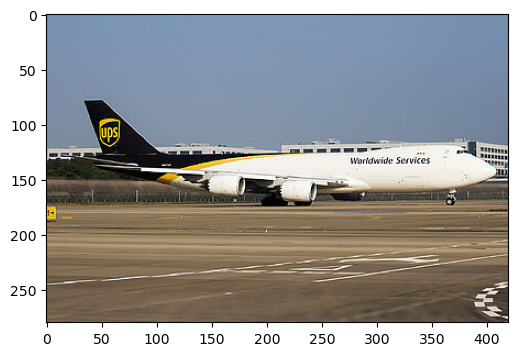

In [65]:
if len(data['photos']) > 0:
    urllib.request.urlretrieve(data['photos'][0]['thumbnail_large']['src'],"_most_recent_aircraft_image.png")
    img = Image.open("_most_recent_aircraft_image.png")
    plt.figure(figsize=(6,4))
    plt.imshow(img)
    plt.show()
else:
    print("Not Available")

### Flight Number Lookup

In [66]:
from requests.adapters import HTTPAdapter
from urllib3.util.retry import Retry


def get_website(site_link, reg_no):
    session = requests.Session()
    adapter = HTTPAdapter(max_retries=Retry(connect=3, backoff_factor=0.5))
    session.mount("http://", adapter)
    session.mount("https://", adapter)
    _request = session.get(site_link + reg_no)
    return _request.status_code, _request.text

In [67]:
sc, html_text = get_website('https://www.flightera.net/en/flight/', 'LH500')

In [68]:
html_text

'<!DOCTYPE html><html lang="en-US"><head><title>Just a moment...</title><meta http-equiv="Content-Type" content="text/html; charset=UTF-8"><meta http-equiv="X-UA-Compatible" content="IE=Edge"><meta name="robots" content="noindex,nofollow"><meta name="viewport" content="width=device-width,initial-scale=1"><link href="/cdn-cgi/styles/challenges.css" rel="stylesheet"><meta http-equiv="refresh" content="375"></head><body class="no-js"><div class="main-wrapper" role="main"><div class="main-content"><noscript><div id="challenge-error-title"><div class="h2"><span class="icon-wrapper"><div class="heading-icon warning-icon"></div></span><span id="challenge-error-text">Enable JavaScript and cookies to continue</span></div></div></noscript></div></div><script>(function(){window._cf_chl_opt={cvId: \'2\',cZone: "www.flightera.net",cType: \'managed\',cNounce: \'5208\',cRay: \'8445376b3b7c85b1\',cHash: \'6cd821068b8a781\',cUPMDTk: "\\/en\\/flight\\/LH500?__cf_chl_tk=JpDILDqdwMPIkZeaXJQhJGh0NEDZPzwlEg

In [73]:
dr.get('https://www.flightera.net/en/flight/' + 'LH500')
soup2 = BeautifulSoup(dr.page_source,"lxml")

In [77]:
# soup = BeautifulSoup(html_text, 'lxml')
info = soup2.find('main', class_='flex-auto px-2 max-w-4xl mt-4 mx-auto')

In [78]:
flight_number_info = info.find('h1', class_='text-xl text-center leading-5 font-bold text-gray-800 dark:text-white')
flight_number_info.text.strip()

'Lufthansa LH500  (DLH500)'

In [79]:
flight_status = info.find('dd', class_='text-center text-sm leading-5 text-gray-900 dark:text-white mt-2')
flight_status.text.strip()

'This flight is scheduled, it will depart in 9 hours.'

In [82]:
origin_and_destination = info.findAll('span', class_='text-xl')
origin_name = origin_and_destination[0].text.strip()
destination_name = origin_and_destination[1].text.strip()
print(origin_name)
print(destination_name)

Frankfurt
Rio de Janeiro


In [87]:
origin_airport_code_info = info.find('dd', class_='text-left text-xs leading-5 text-gray-500 dark:text-white')
code_string = remove_delimiters(origin_airport_code_info.text.strip())
origin_airport_code = code_string[0:3] + "/" + code_string[-4:]
origin_airport_code

'FRA/EDDF'

In [88]:
destination_airport_code_info = info.find('dd', class_='text-right text-xs leading-5 text-gray-500 dark:text-white')
code_string = remove_delimiters(destination_airport_code_info.text.strip())
destination_airport_code = code_string[0:3] + "/" + code_string[-4:]
destination_airport_code

'GIG/SBGL'

In [90]:
flight_info = info.find('div', class_='col-span-1 text-xs text-center text-gray-600 dark:text-white mt-2')
flight_duration_info = flight_info.findAll('span', class_='whitespace-nowrap')
flight_duration = flight_duration_info[0].text.strip()
flight_distance = flight_duration_info[1].text.strip()
print(flight_duration)
print(flight_distance)


12h 25m
9,579km  / 5,913mi


In [91]:
terminal_and_gate_origin = info.find('dd', class_='text-left text-sm leading-5 text-gray-800 dark:text-white')
print(terminal_and_gate_origin.text)


CHECK-IN: 259-488
TERMINAL: 1
GATE: B25



In [92]:
terminal_and_gate_destination = info.find('dd', class_='text-right text-sm leading-5 text-gray-500 dark:text-white')
print(terminal_and_gate_destination.text)


TERMINAL: 2



In [93]:
frequency_info = info.find('div', class_='col-span-1 text-left').find('dd')
frequency = frequency_info.find('span').text
print(frequency)
days_running = frequency_info.text.strip()[len(frequency):].strip()
print(days_running)

AttributeError: 'NoneType' object has no attribute 'find'

In [96]:
depatrure = info.find("dt", class_="text-left text-md text-base leading-5 text-gray-800 dark:text-gray-100")
departure = depatrure.text.strip()
departure[-9:-4] + " " + departure[-3:]

'22:11 CET'

In [97]:
arrival = info.find("dt", class_="text-right text-md text-base leading-5 text-gray-800 dark:text-gray-100")
arrival.find("span", class_="whitespace-nowrap").text

'\n06:40\nUTC-03'

In [98]:
airline_name = info.find('dd', class_='text-sm text-right leading-5 text-gray-900 dark:text-white')
print(airline_name.text.strip())

AttributeError: 'NoneType' object has no attribute 'text'

In [106]:
_headings = info.findAll('dt', class_='font-bold text-gray-500 dark:text-gray-700')
plane_info_headings = []
for i in _headings:
    plane_info_headings.append(i.text.strip())

# _headings = info.findAll('dt', class_='text-right text-sm leading-5 font-bold text-gray-500 dark:text-gray-300')
# for k in _headings:
#     plane_info_headings.append(k.text.strip())
plane_info_headings

['NAME',
 'IATA / ICAO',
 'COUNTRY',
 'MODEL',
 'ICAO IDENTIFIER',
 'SEAT CONFIGURATION',
 'FIRST FLIGHT',
 'DIRECT DISTANCE',
 'FLIGHT TIME',
 'FLIGHTS / WEEK',
 'PUNCTUALITY',
 'SEATS / WEEK']

In [111]:
# plane_info = []
# plane_info_superclass = info.findAll('div', 'col-span-1 lg:text-center dark:bg-gray-400 bg-gray-100 rounded-lg p-4 shadow text-center text-sm leading-5')
# for plane_info_item in plane_info_superclass:
#     i = plane_info_item.find('dd')
#     plane_info.append(i.text.strip())
# plane_info
model_and_seat_config_info = info.findAll('dd', class_='text-gray-500 dark:text-white')
plane_info_items = []
for i in model_and_seat_config_info:
    plane_info_items.append(i.text.strip())

# icao_identifier = info.find('dd', class_='text-right text-sm leading-5 text-gray-900 dark:text-white')
# plane_info_items.append(icao_identifier.text.strip())

# first_flight = info.findAll('dd', class_='text-right text-sm leading-5 text-gray-500 dark:text-white')[1]
# plane_info_items.append(first_flight.text.strip())


# plane_info_items[0] = " ".join(plane_info_items[0].split()) 
# plane_info_items[3] = plane_info_items[3][0:8]

print(plane_info_items[0])
print(plane_info_items[1])
print(plane_info_items[2])

plane_info_items

D-AIFE
              Airbus A340-300
298 seats
18 Business
19 Eco+
261 Economy
Sep 200122 years ago


['D-AIFE\n              Airbus A340-300',
 '298 seats\n18 Business\n19 Eco+\n261 Economy',
 'Sep 200122 years ago',
 '3x per week\n\n            \n                                Tue, Thu, Sat']

In [112]:
plane_info_dict = dict(zip(plane_info_headings, plane_info_items))
plane_info_dict

{'NAME': 'D-AIFE\n              Airbus A340-300',
 'IATA / ICAO': '298 seats\n18 Business\n19 Eco+\n261 Economy',
 'COUNTRY': 'Sep 200122 years ago',
 'MODEL': '3x per week\n\n            \n                                Tue, Thu, Sat'}

In [105]:
tables = pd.read_html(dr.page_source)
tables

[               DATE FLIGHT NUMBER  \
 0  14. Jan  Planned         LH500   
 1  12. Jan  On Time         LH500   
 2   10. Jan  Landed         LH500   
 3   07. Jan  Landed         LH500   
 4   05. Jan  Landed         LH500   
 
                                                 FROM  \
 0  Frankfurt  22:15 CET  Frankfurt (FRA / EDDF)  ...   
 1  Frankfurt  22:15 CET  Frankfurt (FRA / EDDF)  ...   
 2  Frankfurt  19min late Frankfurt (FRA / EDDF)  ...   
 3  Frankfurt  33min late Frankfurt (FRA / EDDF)  ...   
 4  Frankfurt  19min late Frankfurt (FRA / EDDF)  ...   
 
                                                   TO           DEPARTED  \
 0  Rio de Janeiro  06:40 UTC-03  Rio de Janeiro (...                NaN   
 1  Rio de Janeiro  06:40 UTC-03  Rio de Janeiro (...                NaN   
 2  Rio de Janeiro  25min early Rio de Janeiro (GI...  22:34  19min late   
 3  Rio de Janeiro  11min early Rio de Janeiro (GI...  22:48  33min late   
 4  Rio de Janeiro  9min early Rio de Janeiro 

In [100]:
df = tables[0]
df

,DATE,FLIGHT NUMBER,FROM,TO,DEPARTED,ARRIVED,Unnamed: 6
0,14. Jan Planned,LH500,Frankfurt 22:15 CET Frankfurt (FRA / EDDF) ...,Rio de Janeiro 06:40 UTC-03 Rio de Janeiro (...,NaN,NaN,NaN
1,12. Jan On Time,LH500,Frankfurt 22:15 CET Frankfurt (FRA / EDDF) ...,Rio de Janeiro 06:40 UTC-03 Rio de Janeiro (...,NaN,NaN,NaN
2,10. Jan Landed,LH500,Frankfurt 19min late Frankfurt (FRA / EDDF) ...,Rio de Janeiro 25min early Rio de Janeiro (GI...,22:34 19min late,06:14 25min early,NaN
3,07. Jan Landed,LH500,Frankfurt 33min late Frankfurt (FRA / EDDF) ...,Rio de Janeiro 11min early Rio de Janeiro (GI...,22:48 33min late,06:28 11min early,NaN
4,05. Jan Landed,LH500,Frankfurt 19min late Frankfurt (FRA / EDDF) ...,Rio de Janeiro 9min early Rio de Janeiro (GIG...,22:34 19min late,06:30 9min early,NaN


In [101]:
df = df.iloc[:, :-1]

In [102]:
df

,DATE,FLIGHT NUMBER,FROM,TO,DEPARTED,ARRIVED
0,14. Jan Planned,LH500,Frankfurt 22:15 CET Frankfurt (FRA / EDDF) ...,Rio de Janeiro 06:40 UTC-03 Rio de Janeiro (...,NaN,NaN
1,12. Jan On Time,LH500,Frankfurt 22:15 CET Frankfurt (FRA / EDDF) ...,Rio de Janeiro 06:40 UTC-03 Rio de Janeiro (...,NaN,NaN
2,10. Jan Landed,LH500,Frankfurt 19min late Frankfurt (FRA / EDDF) ...,Rio de Janeiro 25min early Rio de Janeiro (GI...,22:34 19min late,06:14 25min early
3,07. Jan Landed,LH500,Frankfurt 33min late Frankfurt (FRA / EDDF) ...,Rio de Janeiro 11min early Rio de Janeiro (GI...,22:48 33min late,06:28 11min early
4,05. Jan Landed,LH500,Frankfurt 19min late Frankfurt (FRA / EDDF) ...,Rio de Janeiro 9min early Rio de Janeiro (GIG...,22:34 19min late,06:30 9min early
